In [44]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

alpha = 10.0        # diffusivity
L = 1.0            # length of the rod
N = 10             # number of intervals (so N+1 points)
dx = L / N
dt = 0.005        # time step
T_final = 0.05     # final time

r = alpha * dt / dx**2
print("r =", r)
if r > 0.5:
    print("Warning: explicit scheme may be unstable (r > 0.5)")

r = 4.999999999999999


In [45]:
# grid points (including boundaries)
x = np.linspace(0, L, N + 1)

# initial condition: u(x,0) = sin(pi x)
u0 = np.sin(np.pi * x)


In [46]:
# extract interior points as the unknown vector
u = u0[1:-1].copy()      # size N-1 (interior points only) since boundary points are known (Dirichlet BCs)

In [47]:
M = N - 1                # number of interior points
A = np.zeros((M, M))

# main diagonal
np.fill_diagonal(A, 1 - 2 * r)
# upper diagonal
np.fill_diagonal(A[:-1, 1:], r)
# lower diagonal
np.fill_diagonal(A[1:, :-1], r)
print("Matrix A:\n", A)

Matrix A:
 [[-9.  5.  0.  0.  0.  0.  0.  0.  0.]
 [ 5. -9.  5.  0.  0.  0.  0.  0.  0.]
 [ 0.  5. -9.  5.  0.  0.  0.  0.  0.]
 [ 0.  0.  5. -9.  5.  0.  0.  0.  0.]
 [ 0.  0.  0.  5. -9.  5.  0.  0.  0.]
 [ 0.  0.  0.  0.  5. -9.  5.  0.  0.]
 [ 0.  0.  0.  0.  0.  5. -9.  5.  0.]
 [ 0.  0.  0.  0.  0.  0.  5. -9.  5.]
 [ 0.  0.  0.  0.  0.  0.  0.  5. -9.]]


In [48]:
t = 0.0
solutions = [u0.copy()]   # store full solution including boundaries
times = [t]

while t < T_final:
    u = A @ u             # explicit update: u^{n+1} = A u^n
    t += dt

    # rebuild full vector with boundary values (0 at both ends)
    u_full = np.zeros(N + 1)
    u_full[1:-1] = u

    solutions.append(u_full)
    times.append(t)


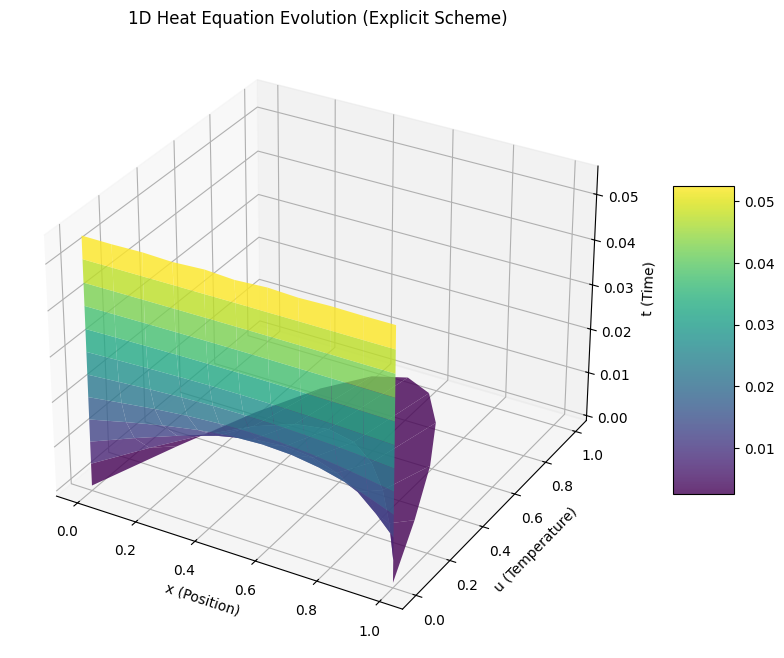

In [49]:
# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for surface plot
X, T = np.meshgrid(x, times)
U = np.array(solutions)

# Plot surface: x on x-axis, temperature (u) on y-axis, time (t) on z-axis
surf = ax.plot_surface(X, U, T, cmap='viridis', alpha=0.8, edgecolor='none')

ax.set_xlabel('x (Position)')
ax.set_ylabel('u (Temperature)')
ax.set_zlabel('t (Time)')
ax.set_title('1D Heat Equation Evolution (Explicit Scheme)')

# Add colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

plt.show()